In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

done


In [2]:
data = pd.read_csv('Data\lustered_Data.csv')
print(data.shape)
data.head()

(388, 10)


,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
0,James Harden,HOU,G,8,-0.885136,3.422465,-1.621294,0.948575,-1.099479,-2.343132
1,Paul George,OKC,F,9,-0.890508,2.411931,1.302698,-0.441489,-1.089950,-0.281768
2,Giannis Antetokounmpo,MIL,F,8,0.708961,2.609108,-0.086844,-1.719613,-1.099307,-1.959700
3,Joel Embiid,PHI,F-C,1,1.700382,2.712573,0.671696,1.738021,-0.219439,0.719804
4,LeBron James,LAL,F,8,-0.307667,2.364341,-0.870264,-0.160012,-0.929572,-2.150918


In [3]:
data.describe().round(1)

,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
count,388.0,388.0,388.0,388.0,388.0,388.0,388.0
mean,5.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,2.5,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,-1.4,-2.0,-2.3,-2.7,-2.7,-2.5
25%,3.0,-0.8,-0.8,-0.8,-0.6,-0.7,-0.6
50%,5.0,-0.3,-0.1,0.1,0.0,-0.1,0.0
75%,7.0,0.6,0.7,0.7,0.6,0.7,0.6
max,9.0,3.1,3.4,2.7,3.3,3.8,3.2


# Comparing PC mean values

In [4]:
data.groupby('CLUSTER').mean()

,PC1,PC2,PC3,PC4,PC5,PC6
CLUSTER,,,,,,
1,1.433221,0.807738,0.314100,1.694060,-0.028986,0.262235
2,1.663214,-0.162279,-0.488651,-0.639146,0.611367,-0.351145
3,-0.808923,-0.312480,0.847472,0.064804,1.420500,0.276753
4,-0.128419,-0.826776,0.076218,-0.416456,-0.410465,-0.562012
5,0.056759,-0.445815,1.037910,-0.165740,-1.033660,1.061367
6,-0.171756,0.369630,1.099699,-0.045119,-0.188547,-0.450279
7,-0.471060,-0.819563,-1.350117,0.818689,0.006772,0.499706
8,-0.719421,1.742392,-0.761756,0.142731,0.000768,-0.985747
9,-0.748950,0.721111,-0.578905,-0.426254,-0.273819,0.752118


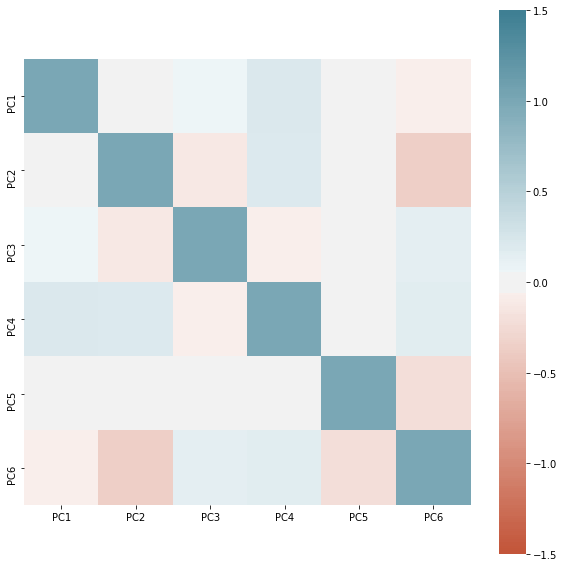

In [5]:
heatmap(data.groupby('CLUSTER').mean(), vmin = -1.5, vmax = 1.5, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True)

# Analysis of each cluster:


In [6]:
data[data['CLUSTER'] == 1].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
3,Joel Embiid,PHI,F-C,1,1.700382,2.712573,0.671696,1.738021,-0.219439,0.719804
9,Anthony Davis,NOP,F-C,1,1.236315,2.579160,0.733884,1.043634,-0.683206,0.066982
14,Karl-Anthony Towns,MIN,C,1,1.744433,2.364006,0.995082,2.442603,-0.567570,0.540336
21,LaMarcus Aldridge,SAS,C-F,1,1.960305,2.001107,0.275611,3.316683,1.651875,0.320177
28,Nikola Vucevic,ORL,C,1,2.002284,2.224888,0.547447,3.014512,0.638088,0.961189
31,Nikola Jokic,DEN,C,1,1.320324,2.430061,-0.222251,1.655794,-0.330345,0.460097
38,Lauri Markkanen,CHI,F,1,0.541152,1.015525,1.817092,1.789911,-0.324698,0.025979
52,Kevin Love,CLE,F-C,1,0.658898,0.588105,1.635770,2.189544,-0.549368,0.183993
62,Deandre Ayton,PHX,C,1,2.478476,1.547085,-0.398251,0.339494,0.576832,0.272241
70,Jusuf Nurkic,POR,C,1,2.207121,1.123892,-0.616773,1.049126,0.006830,0.963688


In [7]:
data[data['CLUSTER'] == 2].head(10)


,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
50,Andre Drummond,DET,C,2,2.745549,1.589518,-0.270823,-1.038935,-1.107920,1.089439
58,Clint Capela,HOU,C,2,2.870142,1.152039,-0.419089,-2.680947,0.207584,2.139539
59,Montrezl Harrell,LAC,F-C,2,1.987095,1.102524,-0.212176,-0.540231,0.414095,0.263080
67,Rudy Gobert,UTA,C,2,3.128527,1.276017,-0.479629,-2.126986,1.036688,2.105248
91,Steven Adams,OKC,C,2,2.545855,1.210059,-0.769108,-1.472477,0.108584,1.917828
122,JaVale McGee,LAL,C,2,2.329112,0.401111,-0.087560,-1.329101,0.462205,-1.044800
126,Derrick Favors,UTA,F-C,2,1.908237,0.270783,0.305943,-0.508726,0.148606,0.285742
140,Alex Len,ATL,C,2,1.469903,-0.059058,0.584579,0.574801,0.210719,0.048107
141,DeAndre Jordan,NYK,C,2,2.358571,0.240617,-1.694443,-1.160513,0.702457,0.974165
145,Jarrett Allen,BKN,C,2,2.624708,0.319553,-0.522113,-1.379196,1.126874,2.492908


In [8]:
data[data['CLUSTER'] == 3].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
5,Stephen Curry,GSW,G,3,-1.145557,1.970408,1.401391,-0.259182,1.693296,1.105336
19,Klay Thompson,GSW,G,3,-0.810046,1.321594,2.678729,0.544248,2.799067,-0.220348
27,CJ McCollum,POR,G,3,-1.045642,1.527598,0.348045,0.159412,3.007344,1.167013
46,JJ Redick,PHI,G,3,-1.232500,0.347590,1.856907,0.077765,3.835563,1.200237
78,Evan Fournier,ORL,G-F,3,-0.975394,0.742000,0.194824,-0.172537,2.039042,1.503322
95,Joe Harris,BKN,F-G,3,-0.434311,0.218339,2.053371,-0.343499,1.671879,1.241426
118,Wesley Matthews,IND,G-F,3,-0.732894,0.021707,1.016825,0.134833,0.895229,1.412658
121,Dion Waiters,MIA,G,3,-1.115618,0.151025,0.527523,0.522390,0.093084,0.165303
127,Bryn Forbes,SAS,G,3,-0.999836,-0.005268,0.644119,0.536263,1.047315,0.986449
135,Reggie Bullock,LAL,G-F,3,-0.693083,-0.307680,1.613038,0.083277,1.377525,1.678700


In [9]:
data[data['CLUSTER'] == 4].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
137,Darren Collison,IND,G,4,-1.215894,0.651650,-0.812430,-1.068004,-0.632418,0.015298
138,Rodney Hood,POR,G,4,-0.673058,-0.233236,-0.073056,0.985289,0.029186,-0.979038
148,Allonzo Trier,NYK,G,4,-0.681839,-0.169964,-0.299102,0.053534,0.279132,-1.188147
164,Tyreke Evans,IND,G,4,-0.823107,-0.022912,-0.565930,0.151501,-0.421559,-0.742018
183,JaMychal Green,LAC,F,4,0.675251,-0.452780,0.822046,0.126218,-1.028874,-1.707167
191,Alex Caruso,LAL,G,4,-0.665754,0.039575,-0.872259,-0.777530,-0.805759,-0.092129
199,Tomas Satoransky,WAS,G-F,4,-0.404536,0.294188,-0.379684,-0.440966,-0.631182,-0.125171
203,Delon Wright,MEM,G,4,-0.506248,0.083454,-1.143453,-1.025837,-0.739228,0.191848
205,Norman Powell,TOR,F-G,4,-0.651551,-0.419986,0.218731,-0.930329,0.806924,-0.938448
208,Rodions Kurucs,BKN,F,4,0.124255,-0.441624,0.849067,-0.985097,-0.472183,-0.531856


In [10]:
data[data['CLUSTER'] == 5].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
77,Nikola Mirotic,MIL,F,5,0.360090,0.234053,1.690827,1.363333,-0.545990,1.168271
98,Jerami Grant,OKC,F,5,0.628417,0.229135,1.692898,-0.249911,-1.543455,0.712066
105,Robert Covington,MIN,F,5,-0.388871,0.495462,1.722669,-2.372609,-2.331495,0.813254
114,Trevor Ariza,WAS,F,5,-0.690809,0.291779,1.045296,-0.645606,-2.317764,0.456058
115,Brook Lopez,MIL,C,5,0.833904,0.803470,2.286619,0.202690,0.403123,2.462854
150,Dewayne Dedmon,ATL,C,5,1.367974,0.327913,0.860919,-0.415010,-0.987921,1.187937
158,Justin Holiday,MEM,F-G,5,-0.651512,-0.085993,1.412649,-1.015101,-0.776348,1.084412
163,Danny Green,TOR,G-F,5,-0.547512,0.339723,1.995311,-1.002141,0.026358,1.474892
166,Marvin Williams,CHA,F,5,0.382107,-0.112224,1.915788,0.769565,-1.542197,0.726311
185,Al-Farouq Aminu,POR,F,5,0.215265,-0.071177,1.168397,-0.895831,-1.218019,1.229785


In [11]:
data[data['CLUSTER'] == 6].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
20,Julius Randle,NOP,C-F,6,0.646432,1.537726,0.700066,0.495239,-0.962285,-1.036369
30,Buddy Hield,SAC,G,6,-0.861991,1.146348,1.886354,-0.551442,0.567147,0.187014
32,Tobias Harris,PHI,F,6,-0.193366,1.449559,1.004438,0.654475,0.427395,-0.550261
34,Danilo Gallinari,LAC,F,6,-0.076052,1.130464,1.161193,1.417327,0.490772,-0.135640
35,John Collins,ATL,F-C,6,1.563363,1.003331,1.060967,-0.334233,-0.869182,-1.081470
40,Kyle Kuzma,LAL,F,6,0.107763,0.967636,1.217674,0.278358,0.261267,0.219828
44,Andrew Wiggins,MIN,F-G,6,-0.501406,1.136991,0.886346,0.094373,-0.556340,-0.183908
45,Tim Hardaway Jr.,DAL,G,6,-0.874800,0.741702,1.674678,0.558154,0.139045,0.310866
48,T.J. Warren,PHX,F,6,-0.427190,0.764006,1.356985,0.161269,-0.737365,-0.556899
49,Bojan Bogdanovic,IND,F,6,-0.647590,0.752850,1.567032,-0.264460,1.409605,-0.570635


In [12]:
data[data['CLUSTER'] == 7].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
106,Cedi Osman,CLE,F,7,-0.126930,-0.355441,-0.826337,1.538039,-1.002442,2.454074
144,J.J. Barea,DAL,G,7,-1.205997,0.285112,-2.213960,0.828842,1.177516,-0.359608
168,Kadeem Allen,NYK,G,7,-0.773149,-0.138457,-1.106983,0.168764,-0.813136,-0.309221
178,Jeremy Lin,TOR,G,7,-0.757983,-0.060321,-1.215518,0.014851,-0.135098,0.323270
180,Tony Parker,CHA,G,7,-0.963311,-0.231625,-2.283672,0.652831,1.498004,-1.414960
181,Shabazz Napier,BKN,G,7,-0.902683,-0.147208,-1.108925,0.414544,0.673289,-0.104543
202,Alec Burks,SAC,G,7,0.000834,-0.975666,-0.980572,1.808464,-0.986136,1.221057
217,Markelle Fultz,ORL,G,7,-0.038947,-0.634986,-1.804109,1.173600,-0.150613,1.982271
218,Austin Rivers,HOU,G,7,-0.669807,-0.424115,-0.702792,0.310630,-0.154602,0.066100
220,Isaiah Thomas,DEN,G,7,-1.006710,-1.011771,-1.319170,0.386419,1.167699,-0.594866


In [13]:
data[data['CLUSTER'] == 8].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
0,James Harden,HOU,G,8,-0.885136,3.422465,-1.621294,0.948575,-1.099479,-2.343132
2,Giannis Antetokounmpo,MIL,F,8,0.708961,2.609108,-0.086844,-1.719613,-1.099307,-1.959700
4,LeBron James,LAL,F,8,-0.307667,2.364341,-0.870264,-0.160012,-0.929572,-2.150918
6,Kawhi Leonard,TOR,F,8,-0.680197,2.279996,0.241009,0.318551,-0.273696,-1.728965
7,Devin Booker,PHX,G,8,-0.947699,2.022397,-0.645411,0.944556,0.899081,-1.629313
8,Kevin Durant,GSW,F,8,-0.523839,2.370841,0.107175,0.693430,1.252959,-2.235782
10,Damian Lillard,POR,G,8,-1.266701,1.962352,-0.867174,-0.296634,1.463375,0.412198
13,Blake Griffin,DET,F,8,0.181558,1.976938,-0.130740,1.433301,-1.081355,-0.193715
15,Kyrie Irving,BOS,G,8,-1.135391,2.285977,-0.258139,0.177226,0.652245,-0.419217
16,Donovan Mitchell,UTA,G,8,-1.199004,1.671855,-0.510892,-0.209914,1.101978,0.010012


In [14]:
data[data['CLUSTER'] == 9].head(10)

,PLAYER,TEAM,POSITION,CLUSTER,PC1,PC2,PC3,PC4,PC5,PC6
1,Paul George,OKC,F,9,-0.890508,2.411931,1.302698,-0.441489,-1.089950,-0.281768
11,Kemba Walker,CHA,G,9,-1.395522,2.077465,-0.386905,0.227227,0.155480,0.951971
12,Bradley Beal,WAS,G,9,-0.980142,2.206646,0.681754,-0.872895,-0.147017,0.068251
24,Jrue Holiday,NOP,G,9,-0.871544,2.183834,-0.606214,-1.236335,-0.785346,0.145187
26,Mike Conley,MEM,G,9,-1.279614,1.784155,-0.598633,0.057251,0.547628,0.915755
37,Victor Oladipo,IND,G,9,-1.448515,1.799823,-0.221467,-0.247329,-1.208183,0.751203
39,Jimmy Butler,PHI,G-F,9,-0.433312,1.488209,-0.196599,-0.878286,-0.131309,0.273282
56,Spencer Dinwiddie,BKN,G,9,-0.925369,0.709924,-1.362441,0.281992,0.917765,0.530868
57,Collin Sexton,CLE,G,9,-0.983180,0.866189,-0.109376,0.261794,-0.202426,-0.194673
60,Josh Richardson,MIA,G-F,9,-1.048855,1.167596,0.418133,-0.553346,0.549224,1.955845


# Tableau Visualization

In [15]:
stats = pd.read_csv('Data/Regular-Advanced.csv')
stats = stats.merge(data[['PLAYER', 'TEAM', 'POSITION', 'CLUSTER']])
stats = stats[['PLAYER', 'TEAM', 'POSITION', 'PTS', 'FG%', '3P%', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'CLUSTER']]

defense = pd.read_csv('Data/Defensive.csv')
defense = defense.merge(data[['PLAYER', 'TEAM', 'POSITION', 'CLUSTER']])
defense = defense[['PLAYER', 'TEAM', 'POSITION', '<6_DFGM', '6-9_DFGM', '10-15_DFGM', '16-3PT_DFGM', '3PT_DFGM', 'CLUSTER']]

shooting = pd.read_csv('Data/Shooting.csv')
shooting = shooting.merge(data[['PLAYER', 'TEAM', 'POSITION', 'CLUSTER']])
shooting = shooting[['PLAYER', 'TEAM', 'POSITION', 'FGM_<5', 'FGM_5-9', 'FGM_10-14', 'FGM_15-19', 'FGM_20-24', 'FGM_25-29', 'CLUSTER']] 

play_type = pd.read_csv('Data/Play Type.csv')
play_type = play_type.merge(data[['PLAYER', 'TEAM', 'POSITION', 'CLUSTER']])
play_type = play_type[['PLAYER', 'TEAM', 'POSITION', 'ISOLATION_FGM', 'PNR_HANDLER_FGM', 'PNR_ROLL_FGM', 'TRANSITION_FGM',
                       'POST_UP_FGM', 'SPOT_UP_FGM', 'HANDOFF_FGM', 'CUT_FGM', 'OFF_SCREEN_FGM', 'PUTBACK_FGM', 'CLUSTER']]


FileNotFoundError: [Errno 2] File Data/Play Type.csv does not exist: 'Data/Play Type.csv'

In [ ]:
stats = stats.groupby('CLUSTER').mean()
stats['TREB'] = stats['OREB'] + stats['DREB']
stats.drop(['OREB', 'DREB'], axis = 1).to_csv('Tableau/Compare_Mean_Stats.csv')

In [ ]:
defense = defense.groupby('CLUSTER').mean()
defense['Post_DFGM'] = defense['<6_DFGM']
defense['MidRange_DFGM'] = defense['6-9_DFGM'] + defense['10-15_DFGM']
defense['Perimeter_DFGM'] = defense['16-3PT_DFGM'] + defense['3PT_DFGM']
defense['Total_DFGM'] = defense['Post_DFGM'] + defense['MidRange_DFGM'] + defense['Perimeter_DFGM']
defense[['Post_DFGM', 'MidRange_DFGM', 'Perimeter_DFGM', 'Total_DFGM']].to_csv('Tableau/Compare_Mean_Defense.csv')

In [ ]:
shooting = shooting.groupby('CLUSTER').mean()
shooting['Post_FGM'] = shooting['FGM_<5']
shooting['MidRange_FGM'] = shooting['FGM_5-9'] + shooting['FGM_10-14'] + shooting['FGM_15-19']
shooting['Perimeter_FGM'] = shooting['FGM_20-24'] + shooting['FGM_25-29']
shooting['Total_FGM'] = shooting['Post_FGM'] + shooting['MidRange_FGM'] + shooting['Perimeter_FGM']
shooting[['Post_FGM', 'MidRange_FGM', 'Perimeter_FGM', 'Total_FGM']].to_csv('Tableau/Compare_Mean_Shooting.csv')